# Lecture - Static web scraping 3

Author: Jun Sun (jun.sun@gesis.org)

## SelectorLib

SelectorLib is a Python library and a Chrome extension that allows you to create web scraping rules using a YAML configuration file. You can create a YAML file that specifies the rules for extracting data from web pages and use SelectorLib to automate the web scraping process.

### Learning goals
* Install the SelectorLib addon in your browser
* Install the SelectorLib Python package
* Create a YAML file with the browser addon
* Use the YAML file to scrape webpages

### Install the SelectorLib addon in your browser

Using Chrome as an example, go to https://selectorlib.com/.

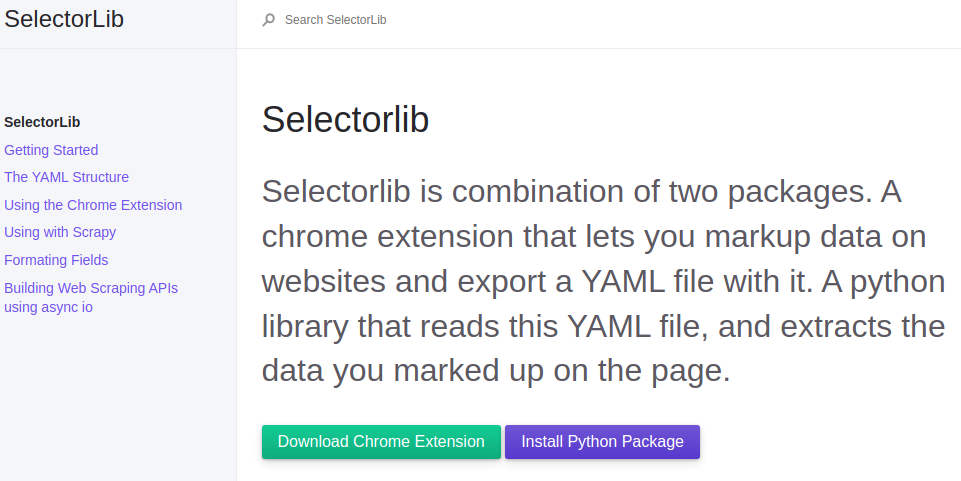

Click “Download Chrome Extension”, then “Add to Chrome”.

### Install the SelectorLib Python package

In [ ]:
# install the selectorlib package
!pip install selectorlib

In [2]:
# import stuffs
from selectorlib import Extractor
import requests

### Create a yaml file with the browser addon

1. Open a webpage. We use the mockup online shop https://scrapeme.live/shop as our running example.

In [3]:
# we start here
url = 'https://scrapeme.live/shop/page/1/'

2. Launch the SelectorLib extension.

   Click on the SelectorLib tab in your Chrome developer tools (Ctrl + Alt + I).

   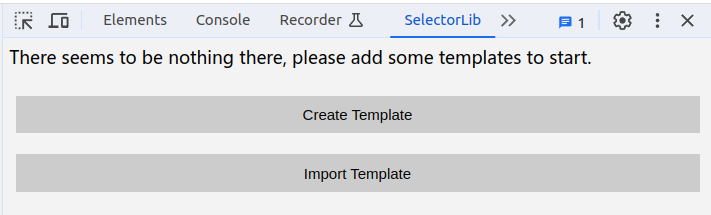

3. Create a template.

   Click on "Create Template" and give it a name.

   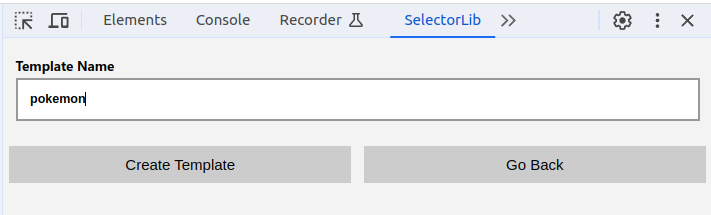
   
4. In the Selectorlib editor, click on "Add +" to add elements. Type in the CSS selector manually, or click on "Select Element" and then click on the element on the webpage.

   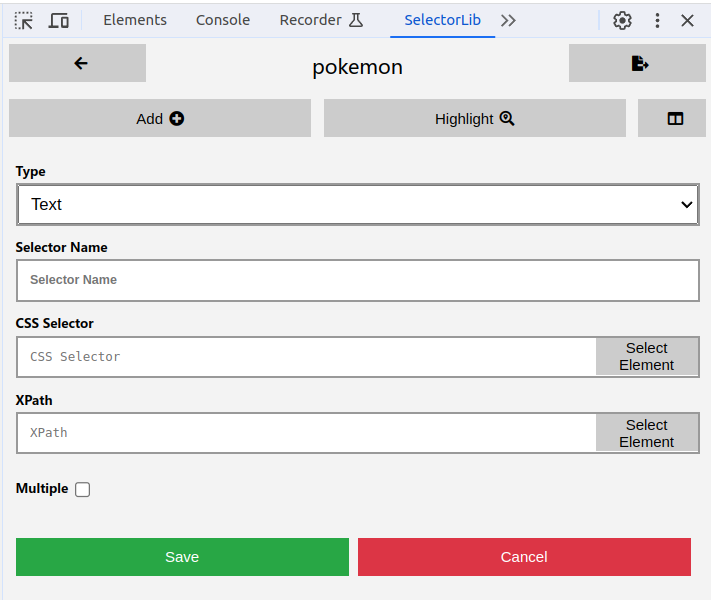
   
5. Adjust the selector so that the element(s) you are interested in is highlighted on the webpage. For example, ticking "Multiple" will allow multiple elements with the same selector.

   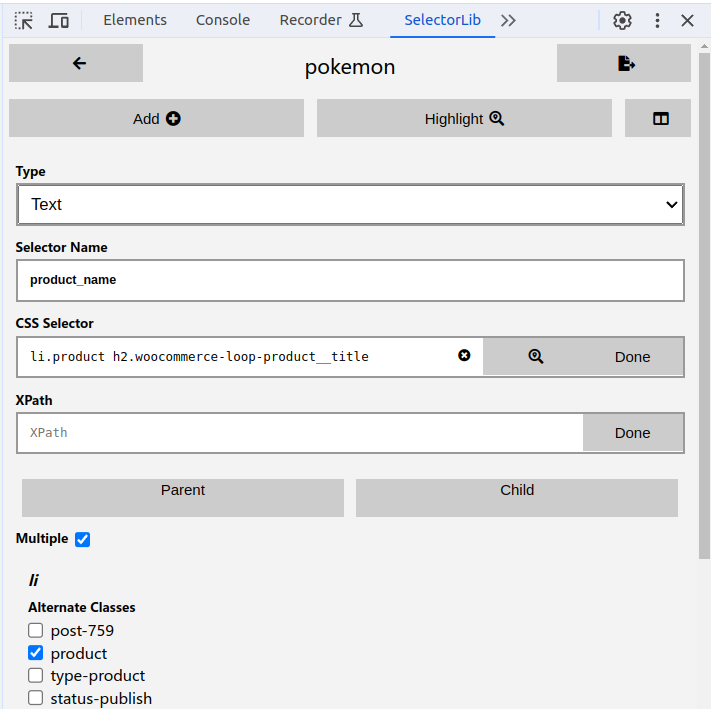
   
6. Preview the data and save the selector. Typically multiple selectors are created.

   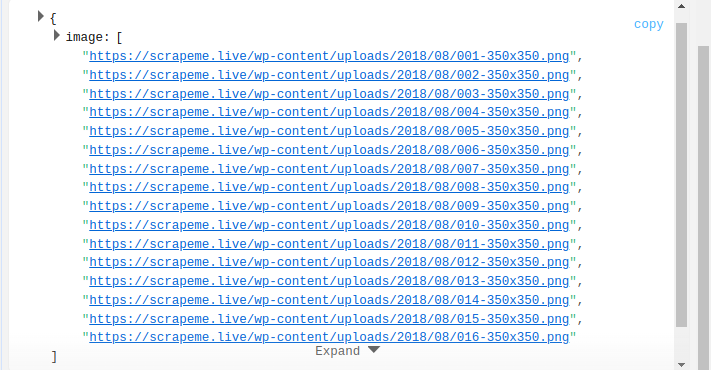
   
7. Once you are satisfied with all selectors, click on "Export Selector YML" and export the YAML configuration .

   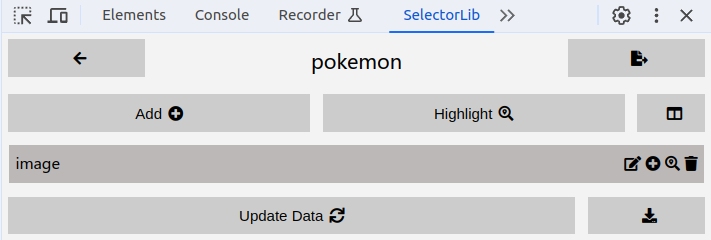

### Use the YAML file to scrape webpages

In [4]:
# load the YAML we got from the SelectorLib addon
yaml = """
  product_name:
      css: 'li.product h2.woocommerce-loop-product__title'
      xpath: null
      multiple: true
      type: Text
  price:
      css: 'li.product span.woocommerce-Price-amount'
      xpath: null
      multiple: true
      type: Text
  image:
      css: 'li.product img.attachment-woocommerce_thumbnail'
      xpath: null
      multiple: true
      type: Image
  link:
      css: 'li.product a.woocommerce-LoopProduct-link'
      xpath: null
      multiple: true
      type: Link
"""

In [5]:
# create a selectorlib extractor from the YAML
e = Extractor.from_yaml_string(yaml)

In [6]:
# request the URL
r = requests.get(url)

In [7]:
# use the extractor to extract the names, images and links
e.extract(r.text)

{'product_name': ['Bulbasaur',
  'Ivysaur',
  'Venusaur',
  'Charmander',
  'Charmeleon',
  'Charizard',
  'Squirtle',
  'Wartortle',
  'Blastoise',
  'Caterpie',
  'Metapod',
  'Butterfree',
  'Weedle',
  'Kakuna',
  'Beedrill',
  'Pidgey'],
 'price': ['£ 63.00',
  '£ 87.00',
  '£ 105.00',
  '£ 48.00',
  '£ 165.00',
  '£ 156.00',
  '£ 130.00',
  '£ 123.00',
  '£ 76.00',
  '£ 73.00',
  '£ 148.00',
  '£ 162.00',
  '£ 25.00',
  '£ 148.00',
  '£ 168.00',
  '£ 159.00'],
 'image': ['https://scrapeme.live/wp-content/uploads/2018/08/001-350x350.png',
  'https://scrapeme.live/wp-content/uploads/2018/08/002-350x350.png',
  'https://scrapeme.live/wp-content/uploads/2018/08/003-350x350.png',
  'https://scrapeme.live/wp-content/uploads/2018/08/004-350x350.png',
  'https://scrapeme.live/wp-content/uploads/2018/08/005-350x350.png',
  'https://scrapeme.live/wp-content/uploads/2018/08/006-350x350.png',
  'https://scrapeme.live/wp-content/uploads/2018/08/007-350x350.png',
  'https://scrapeme.live/wp-co

## Regular expression

Regular expressions (short for regex or regexp) are used to match, substitute strings.

For example:
* validate user input (e.g., phone numbers)
* fetch a substring from string (e.g., “142 in stock”)
* simple string manipulation

In this tutorial we briefly show how regular expressions can be handy in the context of web scraping with some examples. More advanced usage of regex can be found at https://www.datacamp.com/cheat-sheet/regular-expresso for instance.

Python packages for regular expressions: `re` (built-in), `regex` (third-party)

In [8]:
# Import the re package for regular expression handling
import re

Imagine the stock level of a product is shown as "xx in stock" on the webpage. Using the following regex we can retrieve just the number.

In [9]:
# regex for retrieving the stock level
regex_stock = re.compile(r"(\d+) in stock")

In [10]:
# the first element of the result is the stock level
regex_stock.findall("41 in stock")

['41']

What if something is out of stock?

In [11]:
# returns an empty list, but should return 0
regex_stock.findall("out of stock")

[]

In [12]:
# a function with the right behavior
def get_stock_level(str_stock):
  regex_stock = re.compile(r"(\d+) in stock")
  stock_level = regex_stock.findall(str_stock)
  if len(stock_level) == 0:
    return 0
  else:
    return int(stock_level[0])

In [13]:
# try it out
print(get_stock_level("41 in stock"))
print(get_stock_level("out of stock"))

41
0


Another example

In [14]:
# another example of regex for getting the numerical value of price
regex_price = re.compile(r".\s(\d+\.\d+)")
regex_price.findall('£ 87.00')[0]

'87.00'

In [15]:
# convert the string to a float number
float(regex_price.findall('£ 87.00')[0])

87.0